# 워드 클라우드 - SOYNLP version

In [2]:
import re, joblib

In [1]:
with open('data/gift.txt', encoding='utf-8') as file:
    gift_text = file.read()

In [3]:
gift_text[:100]

'\n반지!목걸이!!!!!!!!\n커플 가디건이나 커플 모자는 어떠신지요 :-)\n몇개 추천제품들 투척하고 갑니다 ㅎㅎ\n더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건\nCOUPAN'

- 텍스트 전처리

In [4]:
new_gift_text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', gift_text)
new_gift_text[:100]

' 반지 목걸이         커플 가디건이나 커플 모자는 어떠신지요     몇개 추천제품들 투척하고 갑니다 ㅎㅎ 더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건       '

- 명사 추출

In [5]:
from soynlp.tokenizer import NounLMatchTokenizer

noun_scores = joblib.load('data/noun_scores.pkl')
n_tokenizer = NounLMatchTokenizer(noun_scores)
gift_list = n_tokenizer.tokenize(new_gift_text)
len(gift_list)

16655

In [6]:
gift_list[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '어떠', '몇개', '추천제품들', '투척']

- 한글 폰트 사용

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 필요없는 단어 제거

In [8]:
import nltk

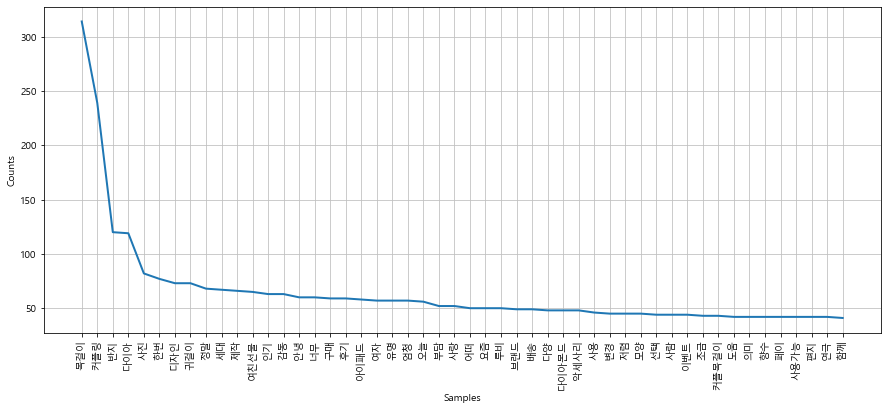

In [13]:
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [12]:
# stop_list = ['선물', '추천']
stopwords = '가격 좋아 가능 여자친구 제품 생각 특별 여친 만원 참고 고급 커플 선물 추천'
stop_list = stopwords.split()
gift_list = [gift for gift in gift_list if gift not in stop_list]

- Wordcloud 그리기

In [20]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud

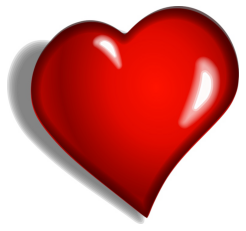

In [15]:
image = Image.open('data/heart.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 314),
 ('커플링', 239),
 ('반지', 120),
 ('다이아', 119),
 ('사진', 82),
 ('한번', 77),
 ('디자인', 73),
 ('귀걸이', 73),
 ('정말', 68),
 ('세대', 67)]

In [18]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/Malgun.ttf',
    relative_scaling=0.2, background_color='white'
).generate_from_frequencies(dict(data))

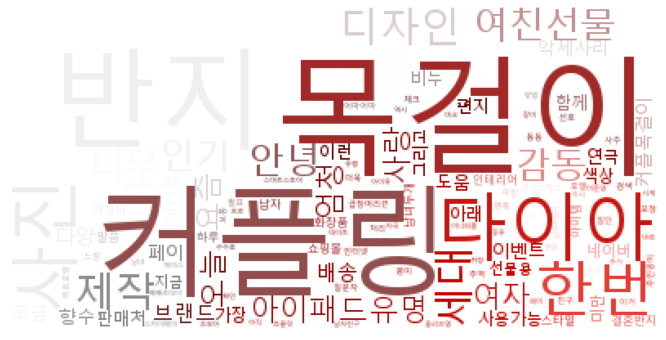

In [24]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 하트 그림에 표시하기

In [21]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)

In [22]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/Malgun.ttf',
    relative_scaling=0.2, background_color='white', mask=mask
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

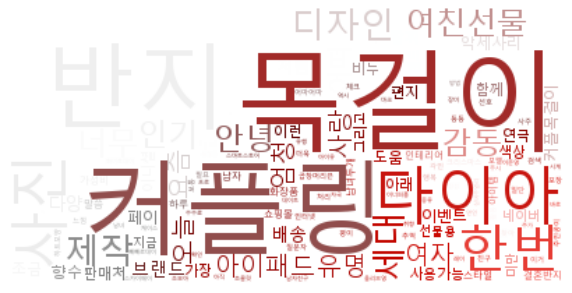

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()